###### Data Science Research Methods IMDB

***

# SussexBudgetProductions

SussexBudgetProductions is one East Sussex's leading production companies, based in Brighton. We are committed to keeping our films high-end, high-impact and low-budget.

## Actionable profit plan
#### Report outline

Below I have outlined an actionable profit plan in which I recommend a suitable action plan for a successful movie. Previously SussexBudgetProductions invested in creating a comedy-action-thriller with a budget of \\$500,000 with a gross of only 20 percent.
In this report, I will show how we can create a high-profit, high-impact film with a budget of  \\$1,500,00.

Brief Report Summary: 

**Part 1**: What data are we using?

**Part 2**: Clean and filter the data set.

**Part 3**: Exploratory data analysis

**Part 4**: Hypothesis testing

**Part 5**: Summary and recommendations

***

## Part 1: What data are we using?

The IMDb (Internet Movie Database) is one of the most recognized names for its comprehensive online database collection of movies, short films and TV series. Unlike other sites, IMDb's reviews come solely from users. Thus, IMDb's biggest strength is that its scores gives us a good idea of what 'normal' consumers think of it.


In [1]:
#Here, I am downloading the data set which is stored in a file `movie_metadata.csv`
#To help analyse the data, I imported a few python libraries which contain a useful set of functions

myfile='movie_metadata.csv'
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.1f' % x)

myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas

df = pd.read_csv(myfile,index_col=None)

#As SussexBudgetProductions is commited to investing in the most profitable film
#Need to add a profit column
#do this by subtracting the budget from the gross

df.insert(4, column='profit', value=df['gross']-df['budget'])

#What does our data look like?

df.head()


,color,director_name,num_critic_for_reviews,duration,profit,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,523505847.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.8,33000
1,Color,Gore Verbinski,302.0,169.0,9404152.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.4,0
2,Color,Sam Mendes,602.0,148.0,-44925825.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.4,85000
3,Color,Christopher Nolan,813.0,164.0,198130642.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.4,164000
4,NaN,Doug Walker,NaN,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [2]:
#This means we have 5043 rows and 29 columns

df.shape

(5043, 29)

In [3]:
#We want to make our data frame easier to read so I changed the order of the columns

titles=['movie_title', 'title_year', 'director_name','gross', 'budget', 'profit','genres', 'country', 'language', 'imdb_score','content_rating', 'duration',
        'director_facebook_likes','actor_1_name','actor_1_facebook_likes', 'actor_2_name','actor_2_facebook_likes', 'actor_3_name','actor_3_facebook_likes', 
 'num_critic_for_reviews', 'movie_facebook_likes','color', 'plot_keywords', 'movie_imdb_link', 'aspect_ratio', 'facenumber_in_poster', 'cast_total_facebook_likes',
        'num_voted_users']

df=df[titles] 

#Looking at the new data frame
df.head()

,movie_title,title_year,director_name,gross,budget,profit,genres,country,language,imdb_score,...,actor_3_facebook_likes,num_critic_for_reviews,movie_facebook_likes,color,plot_keywords,movie_imdb_link,aspect_ratio,facenumber_in_poster,cast_total_facebook_likes,num_voted_users
0,Avatar,2009.0,James Cameron,760505847.0,237000000.0,523505847.0,Action|Adventure|Fantasy|Sci-Fi,USA,English,7.9,...,855.0,723.0,33000,Color,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,1.8,0.0,4834,886204
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,309404152.0,300000000.0,9404152.0,Action|Adventure|Fantasy,USA,English,7.1,...,1000.0,302.0,0,Color,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,2.4,0.0,48350,471220
2,Spectre,2015.0,Sam Mendes,200074175.0,245000000.0,-44925825.0,Action|Adventure|Thriller,UK,English,6.8,...,161.0,602.0,85000,Color,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,2.4,1.0,11700,275868
3,The Dark Knight Rises,2012.0,Christopher Nolan,448130642.0,250000000.0,198130642.0,Action|Thriller,USA,English,8.5,...,23000.0,813.0,164000,Color,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2.4,0.0,106759,1144337
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,NaN,Documentary,NaN,NaN,7.1,...,NaN,NaN,0,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,0.0,143,8


In [4]:
#What data do we have so far? Let's look at averages
#Taking the .mean() of our data frame gives us the means of all the numerical columns

df.mean()

title_year                      2002.5
gross                       48468407.5
budget                      39752620.4
profit                       5844717.0
imdb_score                         6.4
duration                         107.2
director_facebook_likes          686.5
actor_1_facebook_likes          6560.0
actor_2_facebook_likes          1651.8
actor_3_facebook_likes           645.0
num_critic_for_reviews           140.2
movie_facebook_likes            7526.0
aspect_ratio                       2.2
facenumber_in_poster               1.4
cast_total_facebook_likes       9699.1
num_voted_users                83668.2
dtype: float64

***

## Part 2: Cleaning and filtering our data


### 2.1 Removing Duplicates

Some of the data has been duplicated for various reasons, I used the imdb link to remove these. The `movie_imdb_link` is specific to each movie so it is a good indictor if any have been duplicated.

In [5]:
#Using drop_duplicates to remove duplicates

df.drop_duplicates(subset='movie_imdb_link',inplace=True)

In [6]:
# We can see that there were 124 movies duplicated

df.shape

(4919, 28)

### 2.2 Are there any missing values?

In [7]:
#This gives us a summary of the missing values

df.isnull().sum()

movie_title                     0
title_year                    106
director_name                 102
gross                         863
budget                        485
profit                       1129
genres                          0
country                         5
language                       12
imdb_score                      0
content_rating                301
duration                       15
director_facebook_likes       102
actor_1_name                    7
actor_1_facebook_likes          7
actor_2_name                   13
actor_2_facebook_likes         13
actor_3_name                   23
actor_3_facebook_likes         23
num_critic_for_reviews         49
movie_facebook_likes            0
color                          19
plot_keywords                 152
movie_imdb_link                 0
aspect_ratio                  326
facenumber_in_poster           13
cast_total_facebook_likes       0
num_voted_users                 0
dtype: int64

Above, we can see that there are missing values linked to gross and budget, which then leads to missing profit values. I will also remove the missing values for content rating as this could be something to analyse later.

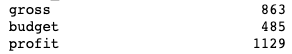

### 2.3 Removing the missing values

Below, we can see that these have now been removed. Notice there are still missing values for `actor_3_name` and `actor_3_facebook_likes`, this could be because there was no actor in these films, so I will keep these values in.



In [8]:
#dropna removed the missing values that are in gross, budget and content rating

df.dropna(subset=['gross','budget','content_rating'], inplace=True)

In [9]:
#checking that these values have been removed

df.isnull().sum()

movie_title                   0
title_year                    0
director_name                 0
gross                         0
budget                        0
profit                        0
genres                        0
country                       0
language                      2
imdb_score                    0
content_rating                0
duration                      0
director_facebook_likes       0
actor_1_name                  1
actor_1_facebook_likes        1
actor_2_name                  2
actor_2_facebook_likes        2
actor_3_name                  6
actor_3_facebook_likes        6
num_critic_for_reviews        1
movie_facebook_likes          0
color                         2
plot_keywords                21
movie_imdb_link               0
aspect_ratio                 55
facenumber_in_poster          6
cast_total_facebook_likes     0
num_voted_users               0
dtype: int64

In [10]:
#the data frame size has decreased by 1,180 rows

df.shape

(3739, 28)

In [11]:
#We can see that the highest profiting film is Avatar, followed by Jurassic world 

df.sort_values(by=['profit'],ascending=False)

,movie_title,title_year,director_name,gross,budget,profit,genres,country,language,imdb_score,...,actor_3_facebook_likes,num_critic_for_reviews,movie_facebook_likes,color,plot_keywords,movie_imdb_link,aspect_ratio,facenumber_in_poster,cast_total_facebook_likes,num_voted_users
0,Avatar,2009.0,James Cameron,760505847.0,237000000.0,523505847.0,Action|Adventure|Fantasy|Sci-Fi,USA,English,7.9,...,855.0,723.0,33000,Color,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,1.8,0.0,4834,886204
29,Jurassic World,2015.0,Colin Trevorrow,652177271.0,150000000.0,502177271.0,Action|Adventure|Sci-Fi|Thriller,USA,English,7.0,...,1000.0,644.0,150000,Color,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,2.0,0.0,8458,418214
26,Titanic,1997.0,James Cameron,658672302.0,200000000.0,458672302.0,Drama|Romance,USA,English,7.7,...,794.0,315.0,26000,Color,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2.4,0.0,45223,793059
3024,Star Wars: Episode IV - A New Hope,1977.0,George Lucas,460935665.0,11000000.0,449935665.0,Action|Adventure|Fantasy|Sci-Fi,USA,English,8.7,...,504.0,282.0,33000,Color,death star|empire|galactic war|princess|rebellion,http://www.imdb.com/title/tt0076759/?ref_=fn_t...,2.4,1.0,13485,911097
3080,E.T. the Extra-Terrestrial,1982.0,Steven Spielberg,434949459.0,10500000.0,424449459.0,Family|Sci-Fi,USA,English,7.9,...,548.0,215.0,34000,Color,bicyclist|boy|doll|star wars reference|voice i...,http://www.imdb.com/title/tt0083866/?ref_=fn_t...,1.9,0.0,2811,281842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Steamboy,2004.0,Katsuhiro Ôtomo,410388.0,2127519898.0,-2127109510.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,Japan,Japanese,6.9,...,101.0,105.0,973,Color,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,1.9,1.0,991,13727
2323,Princess Mononoke,1997.0,Hayao Miyazaki,2298191.0,2400000000.0,-2397701809.0,Adventure|Animation|Fantasy,Japan,Japanese,8.4,...,745.0,174.0,11000,Color,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,1.9,0.0,2710,221552
3005,Fateless,2005.0,Lajos Koltai,195888.0,2500000000.0,-2499804112.0,Drama|Romance|War,Hungary,Hungarian,7.1,...,0.0,73.0,607,Color,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,2.4,0.0,11,5603
3859,Lady Vengeance,2005.0,Chan-wook Park,211667.0,4200000000.0,-4199788333.0,Crime|Drama,South Korea,Korean,7.7,...,38.0,202.0,4000,Color,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,2.4,0.0,907,53508



We can see above that the film with the highest profit was Avatar, directed by James Cameron in 2009 and took in \\$523,505,845. 
However, this box office hit had a budget of \\$237,000,000 which is not in our bracket. We are only interested in the films that have been successful under the budget of \\$1.5 million.


### 2.4 What about the currency?

In [12]:
#checking a country where currency is not in dollars
#checking South Korea in a new dataframe df_testingskorea

df_testingskorea=df[df.country=='South Korea']

In [13]:
#How many films are there made in south korea?

df_testingskorea.shape

(8, 28)

In [14]:
df_testingskorea.sort_values(by=['profit'],ascending=False)

,movie_title,title_year,director_name,gross,budget,profit,genres,country,language,imdb_score,...,actor_3_facebook_likes,num_critic_for_reviews,movie_facebook_likes,color,plot_keywords,movie_imdb_link,aspect_ratio,facenumber_in_poster,cast_total_facebook_likes,num_voted_users
4105,Oldboy,2003.0,Chan-wook Park,2181290.0,3000000.0,-818710.0,Drama|Mystery|Thriller,South Korea,Korean,8.4,...,38.0,305.0,43000,Color,brother sister relationship|hypnosis|imprisonm...,http://www.imdb.com/title/tt0364569/?ref_=fn_t...,2.4,0.0,852,356181
3255,"The Good, the Bad, the Weird",2008.0,Jee-woon Kim,128486.0,10000000.0,-9871514.0,Action|Adventure|Comedy|Western,South Korea,Korean,7.3,...,7.0,152.0,0,Color,bounty hunter|manchuria|map|train|treasure,http://www.imdb.com/title/tt0901487/?ref_=fn_t...,2.4,0.0,569,26156
2914,Tae Guk Gi: The Brotherhood of War,2004.0,Je-kyu Kang,1110186.0,12800000.0,-11689814.0,Action|Drama|War,South Korea,Korean,8.1,...,489.0,86.0,0,Color,1950s|archeologist|korea|korean war|soldier,http://www.imdb.com/title/tt0386064/?ref_=fn_t...,2.4,2.0,1730,31943
2833,The Last Godfather,2010.0,Hyung-rae Shim,163591.0,13400000.0,-13236409.0,Comedy,South Korea,English,3.6,...,385.0,4.0,502,Color,mafia|mafia boss|mafiosi|mafioso|three word title,http://www.imdb.com/title/tt1584131/?ref_=fn_t...,1.8,5.0,2895,912
1564,Dragon Wars: D-War,2007.0,Hyung-rae Shim,10956379.0,35000000.0,-24043621.0,Action|Drama|Fantasy|Horror|Thriller,South Korea,English,3.6,...,535.0,93.0,0,Color,antique shop|asian dragon|dragon|korean|reporter,http://www.imdb.com/title/tt0372873/?ref_=fn_t...,2.4,0.0,3274,21506
1325,Snowpiercer,2013.0,Joon-ho Bong,4563029.0,39200000.0,-34636971.0,Action|Drama|Sci-Fi|Thriller,South Korea,English,7.0,...,398.0,488.0,58000,Color,closed ecological system|perpetual winter|popu...,http://www.imdb.com/title/tt1706620/?ref_=fn_t...,1.9,5.0,12286,181472
3859,Lady Vengeance,2005.0,Chan-wook Park,211667.0,4200000000.0,-4199788333.0,Crime|Drama,South Korea,Korean,7.7,...,38.0,202.0,4000,Color,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,2.4,0.0,907,53508
2988,The Host,2006.0,Joon-ho Bong,2201412.0,12215500000.0,-12213298588.0,Comedy|Drama|Horror|Sci-Fi,South Korea,Korean,7.0,...,74.0,363.0,7000,Color,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,1.9,0.0,1173,68883


As we can see, and with further investigation, the budget for 'The Host' is ₩12 billion which is equivalent to $11miliion. With this information, I have chosen to only focus on films that are in dollars so will filter through to **only analyse USA films**.

### 2.5 Filtering by year and country

As most of the movies on IMDb are in dollars, I will filter through to only use the USA movies for our exploratory step. This is not ideal but, as seen above, some of the movies are in their own currency and will skew the numbers. I also decided to only look at movies after the year 2000 as the budget would be more accurate.


In [15]:
#Taking films after the year 2000
df=df[df.title_year>=2000]

#Only taking films that are made in the USA
df=df[df.country=='USA']

#Checking the size of the new dataframe
#We now have 2660 rows
df.shape

(2128, 28)

In [16]:
#Checking the averages of our new filtered dataframe

df.describe()

,title_year,gross,budget,profit,imdb_score,duration,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,num_critic_for_reviews,movie_facebook_likes,aspect_ratio,facenumber_in_poster,cast_total_facebook_likes,num_voted_users
count,2128.0,2128.0,2128.0,2128.0,2128.0,2128.0,2128.0,2128.0,2127.0,2126.0,2127.0,2128.0,2094.0,2122.0,2128.0,2128.0
mean,2007.5,58142943.9,44388376.3,13754567.6,6.3,107.8,768.5,8812.6,2378.9,921.3,191.3,11608.5,2.1,1.5,13240.7,108742.3
std,4.7,74344030.2,47263547.6,52857646.6,1.0,19.4,3088.5,18932.1,5231.9,2202.8,130.8,24796.9,0.4,2.3,22812.4,148081.0
min,2000.0,703.0,218.0,-190641321.0,1.6,53.0,0.0,0.0,0.0,0.0,1.0,0.0,1.3,0.0,0.0,22.0
25%,2003.0,11427606.5,12000000.0,-9999936.2,5.7,95.0,12.0,834.0,450.0,248.2,98.0,0.0,1.9,0.0,2366.8,20819.8
50%,2008.0,33923883.5,29500000.0,1939822.0,6.4,104.0,60.0,2000.0,769.0,490.0,161.0,401.0,2.4,1.0,5009.0,56739.0
75%,2011.0,75073078.0,60000000.0,27106851.2,7.0,117.0,213.2,14000.0,1000.0,745.0,254.5,14000.0,2.4,2.0,18134.2,137580.2
max,2016.0,760505847.0,300000000.0,523505847.0,9.0,280.0,23000.0,640000.0,137000.0,23000.0,813.0,349000.0,16.0,43.0,656730.0,1676169.0


### Closer eye at the stats...

Averages: **Budget**: \\$44,388,376 | **Gross**: \\$58,142,943 | **Profit**: \\$13,754,567 | **IMDb score**: 6.3 

As we have a budget of \\$1,500,000, we will only focus on movies in a similar bracket. However, it is interesting to see the publics response so certain genres so I will do a short exploratory analysis keeping the higher budget productions into consideration.

***

## Part 3: Exploratory Data Analysis

<div class="alert alert-block alert-info">
<b>Note:</b> All following analysis is only looking at titles made in the USA after the year 2000.</div>


### 3.1 Splitting into Dev and Test sets 

In order to make sure I was not making any assumptions about the data, I will split the data into dev and test sets. 

I will use 50% of the data for the exploratory data analysis and then 50% of the data for testing the hypothesis. This will help with a clearer diagnosis and a hypothesis with no p-hacking.

In [17]:
# creating a dataframe with all the info of movies budget less than 1.5mill

dfwhole_budget = df[df.budget<=1500000]
dfwhole_budget.mean()

title_year                     2006.5
gross                       5052692.4
budget                       672326.8
profit                      4380365.5
imdb_score                        6.5
duration                         93.3
director_facebook_likes         189.2
actor_1_facebook_likes         4905.5
actor_2_facebook_likes          478.1
actor_3_facebook_likes          240.4
num_critic_for_reviews           96.5
movie_facebook_likes           2288.3
aspect_ratio                      2.1
facenumber_in_poster              1.2
cast_total_facebook_likes      6039.1
num_voted_users               22485.0
dtype: float64

In [18]:
#I will set the random seed as part of my candidate number: 244788
import random
from numpy.random import RandomState

#setting a random.seed so that the sample doesn't change each time the kernal re-runs
random.seed(2447)

df_dev = df.sample(frac=0.5, random_state=2447)
df_test =df.loc[~df.index.isin(df_dev.index)]

In [19]:
print(df.shape)
print(df_dev.shape) #We can see that this is half of our filtered data frame

(2128, 28)
(1064, 28)



### 3.2 Exploring the devepment data set

Using our *development* data frame to start exploring our set. Starting with genre analysis:

In [20]:
genreseries=df_dev.groupby('genres')['budget','gross','profit','imdb_score'].mean()

#Set the maximum budget to 1.5 million

max_budget=1500000000

top_genres = genreseries[genreseries['budget']<max_budget]

#We want to present it in IMDb acending scores
top_genres = top_genres.sort_values('profit', ascending=False)


#Print the genres for inspection
top_genres.head()

<ipython-input-20-6e5c3a004911>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genreseries=df_dev.groupby('genres')['budget','gross','profit','imdb_score'].mean()


,budget,gross,profit,imdb_score
genres,,,,
Adventure|Drama|Sci-Fi|Thriller,78000000.0,407999255.0,329999255.0,7.3
Action|Adventure|Comedy|Romance|Sci-Fi,58000000.0,363024263.0,305024263.0,8.1
Action|Biography|Drama|History|Thriller|War,58800000.0,350123553.0,291323553.0,7.3
Action|Adventure|Fantasy|Romance,139000000.0,403706375.0,264706375.0,7.3
Action|Animation|Comedy|Family|Sci-Fi,74000000.0,336029560.0,262029560.0,6.4


Now let's have a look at content rating:

In [21]:
#Grouping the series by content rating
contentseries=df_dev.groupby('content_rating')['budget','gross','profit','imdb_score'].mean()

#If we had unlimited budget

max_budget=1500000000

top_content = contentseries[contentseries['budget']<max_budget]

#We want to present it in IMDb acending scores
top_content = top_content.sort_values('profit', ascending=False)


#Print the genres for inspection
top_content.head()

<ipython-input-21-add56db3af29>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  contentseries=df_dev.groupby('content_rating')['budget','gross','profit','imdb_score'].mean()


,budget,gross,profit,imdb_score
content_rating,,,,
PG,64928796.3,87841262.4,22912466.1,6.1
G,60909090.9,79240701.7,18331610.8,6.2
PG-13,54983062.6,71018003.7,16034941.1,6.2
R,26197970.4,36544790.1,10346819.8,6.5
NC-17,700000.0,1141829.0,441829.0,7.2


What about films that are within our budget bracket?

In [22]:
sbp_genreseries=df_dev.groupby('genres')['budget','gross','profit','imdb_score'].mean()

#Set the maximum budget to 1.5 million

sbp_budget=1500000

top_budget_genres =sbp_genreseries[sbp_genreseries['budget']<sbp_budget]

#We want to present it in IMDb acending scores
top_budget_genres = top_budget_genres.sort_values('profit', ascending=False)


#Print the genres for inspection
top_budget_genres.head()

<ipython-input-22-9cca98e895a9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sbp_genreseries=df_dev.groupby('genres')['budget','gross','profit','imdb_score'].mean()


,budget,gross,profit,imdb_score
genres,,,,
Comedy|Documentary|Drama,65000.0,11529368.0,11464368.0,7.3
Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi,750000.0,5518918.0,4768918.0,6.9
Biography|Documentary,218.0,592014.0,591796.0,7.2
Western,30000.0,243768.0,213768.0,4.1
Documentary|History|Music,200000.0,215185.0,15185.0,7.5


In [23]:
#Grouping the content series
sbp_content_series=df_dev.groupby('content_rating')['budget','gross','profit','imdb_score'].mean()

sbp_budget=1500000

top_budget_content =sbp_content_series[sbp_content_series['budget']<sbp_budget]

#We want to present it in IMDb acending scores
top_budget_content= top_budget_content.sort_values('profit', ascending=False)


#Print the content for inspection
top_budget_content.head()

<ipython-input-23-0757317cef3e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sbp_content_series=df_dev.groupby('content_rating')['budget','gross','profit','imdb_score'].mean()


,budget,gross,profit,imdb_score
content_rating,,,,
NC-17,700000.0,1141829.0,441829.0,7.2
Unrated,540443.6,776171.6,235728.0,7.1


As shown above, content rating does not give us sufficient data to analyse within our budget.

#### Lets explore more about genres...


In [24]:
#We can see that there are many unique 'genres' in our df
#We would like to have a look at specific genres for our title

df_dev['genres'].unique()

array(['Adventure|Family|Sci-Fi', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Drama', 'Thriller', 'Action|Drama|History|War',
       'Action|Adventure|Animation|Comedy|Family', 'Comedy',
       'Crime|Drama|Thriller', 'Comedy|Romance', 'Action|Comedy|Crime',
       'Animation|Comedy|Family|Music|Western',
       'Crime|Drama|Horror|Thriller', 'Horror', 'Drama|Sport',
       'Sci-Fi|Thriller', 'Biography|Drama',
       'Crime|Drama|Mystery|Thriller', 'Action|Crime|Drama|Thriller',
       'Horror|Mystery', 'Drama|Romance', 'Comedy|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy',
       'Adventure|Animation|Comedy|Family|Fantasy|Music', 'Drama|Mystery',
       'Crime|Thriller', 'Horror|Mystery|Thriller',
       'Adventure|Family|Fantasy', 'Drama', 'Comedy|Drama',
       'Drama|Horror|Mystery|Thriller',
       'Adventure|Comedy|Drama|Fantasy|Musical', 'Drama|Fantasy',
       'Mystery|Thriller', 'Drama|Mystery|Thriller',
       '

In [25]:
from pandas import Series

#Splitting the genres
s = df_dev['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'

#Deleting the 'genres' column from the original dataframe
del df_dev['genres']

#Adding the new genres to the data frame
genre_df_dev = df_dev.join(s)


In [26]:
#Now we have a new data frame called 'genre_df'
#What are the uniquite genres in our data frame?

print(genre_df_dev['genres'].unique())

['Action' 'Adventure' 'Fantasy' 'Thriller' 'Romance' 'Animation' 'Comedy'
 'Family' 'Musical' 'Sci-Fi' 'Drama' 'History' 'Sport' 'Horror' 'Crime'
 'Mystery' 'War' 'Biography' 'Music' 'Western' 'Documentary']


In [27]:
#Exploring our new data frame 
#We can see that films come up multiple times with each genre

genre_df_dev.head()

,movie_title,title_year,director_name,gross,budget,profit,country,language,imdb_score,content_rating,...,num_critic_for_reviews,movie_facebook_likes,color,plot_keywords,movie_imdb_link,aspect_ratio,facenumber_in_poster,cast_total_facebook_likes,num_voted_users,genres
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,309404152.0,300000000.0,9404152.0,USA,English,7.1,PG-13,...,302.0,0,Color,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,2.4,0.0,48350,471220,Action
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,309404152.0,300000000.0,9404152.0,USA,English,7.1,PG-13,...,302.0,0,Color,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,2.4,0.0,48350,471220,Adventure
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,309404152.0,300000000.0,9404152.0,USA,English,7.1,PG-13,...,302.0,0,Color,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,2.4,0.0,48350,471220,Fantasy
3,The Dark Knight Rises,2012.0,Christopher Nolan,448130642.0,250000000.0,198130642.0,USA,English,8.5,PG-13,...,813.0,164000,Color,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2.4,0.0,106759,1144337,Action
3,The Dark Knight Rises,2012.0,Christopher Nolan,448130642.0,250000000.0,198130642.0,USA,English,8.5,PG-13,...,813.0,164000,Color,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2.4,0.0,106759,1144337,Thriller


In [28]:
#As there are more than one genre per film
#The dataframe shape has changed and increased the rows

genre_df_dev.shape

(3109, 28)


Let's look at the budget for each genre. I have displayed this as a box plot so we can see the broad distribution of budgets. We can see that 'Adventure' has the highest overall budget and mean.

<AxesSubplot:title={'center':'budget'}, xlabel='[genres]'>

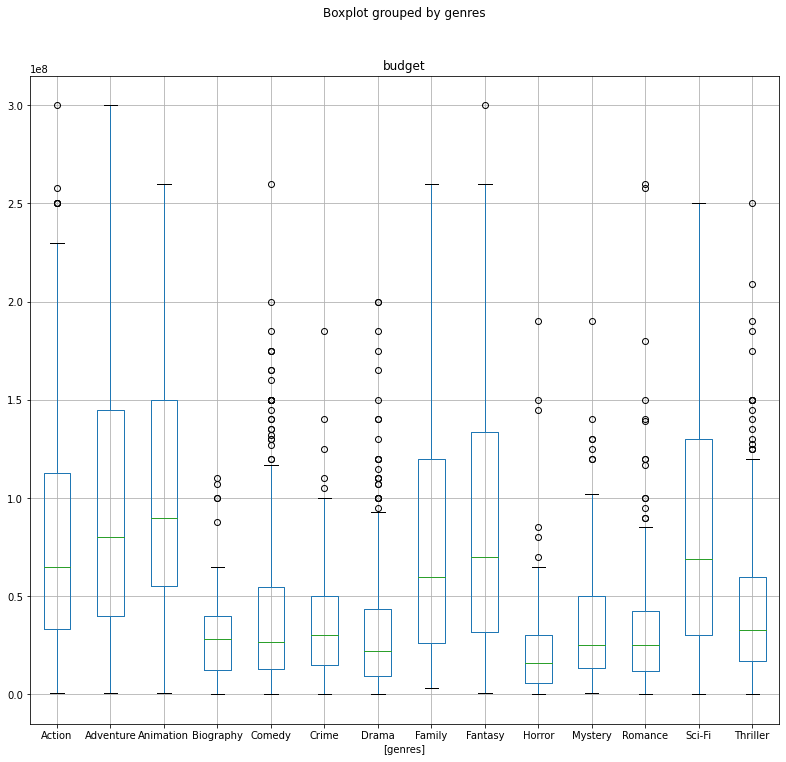

In [29]:
#Make dataframe with just genre and budget data
genre_budgets=genre_df_dev.loc[:,['genres','budget']] 

#Get the frequencies
counts=genre_budgets.groupby('genres').count().reset_index('genres')

#Set the number we consider to be 'big' in terms of films made so that we can plot genres
n=50 

#Making the index by frequencies
bigcounts=counts[counts.budget>n]['genres']

#Using frequency index to make new dataframe with just 'big genres'
biggenres_df = genre_budgets[genre_budgets.genres.isin(bigcounts)]
biggenres_df.boxplot(by='genres',figsize=(13,12))

<AxesSubplot:title={'center':'profit'}, xlabel='[genres]'>

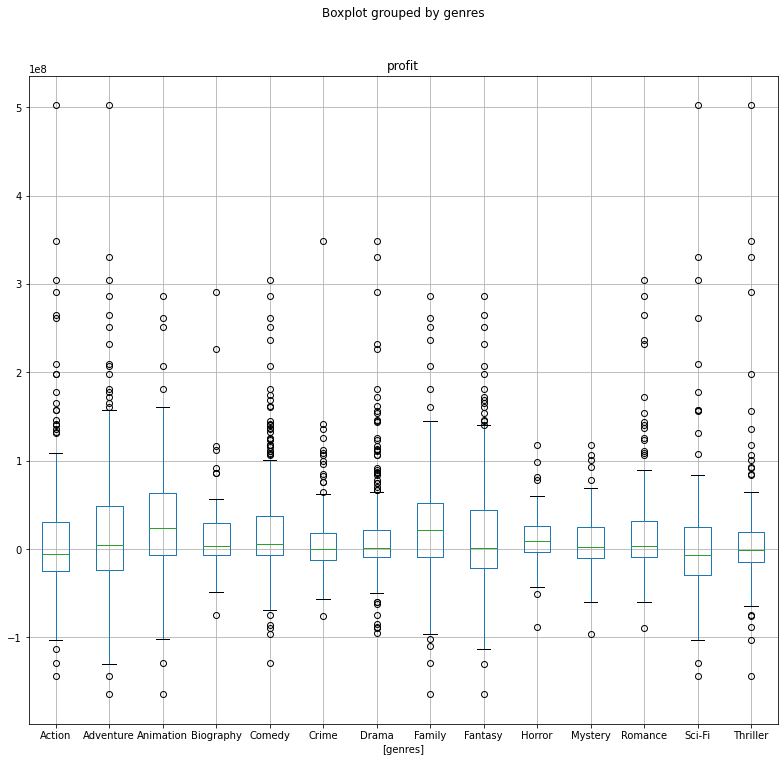

In [30]:
#Now looking at profit distribution per genre
#Make dataframe with just genre and profit

genre_profit=genre_df_dev.loc[:,['genres','profit']]

# get frequencies
counts1=genre_profit.groupby('genres').count().reset_index('genres')

#set the number we consider to be 'big' in terms of films made so that we can plot genres
n=50 

#Making the index by frequencies
bigcounts1=counts1[counts1.profit>n]['genres']
biggenres1_df = genre_profit[genre_profit.genres.isin(bigcounts1)]
biggenres1_df.boxplot(by='genres',figsize=(13,12))

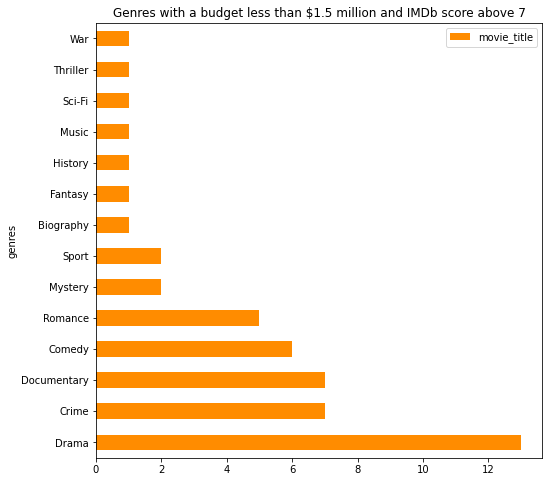

In [31]:
#Looking at number of films

#Filtering through for budget less than 1.5 million

genre_df_dev2 = genre_df_dev[genre_df_dev.budget<=1500000]
genre_df_dev3 = (pd.DataFrame(genre_df_dev2.groupby('genres').movie_title.nunique())).sort_values('movie_title', ascending=False )

#Looking at films with budget less than 1.5 million and an IMDb score of more than 7
genre_df_dev4=genre_df_dev2[genre_df_dev2['imdb_score']>=7]
genre_df_dev5 = (pd.DataFrame(genre_df_dev4.groupby('genres').movie_title.nunique())).sort_values('movie_title', ascending=False )

genre_df_dev5[['movie_title']].plot.barh(stacked=True, title = 'Genres with a budget less than $1.5 million and IMDb score above 7', figsize=(8, 8),
                                        color='darkorange');


Looking at the table above, the most films made within our bracket are **Drama** films. We are interested in profit, so let's look more closely at that: 



Below, is a graph showing 'genres by profit' of all USA films that were made after 2000. The **most profitable films are animation** films and **least are westerns**.


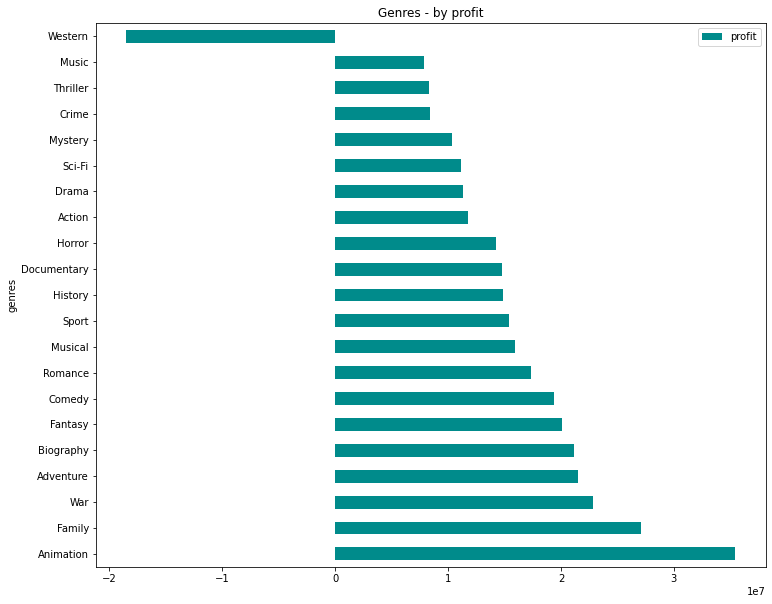

In [32]:
#Let's look at the most profitable film per genre
#Animation is the most profitable 
#Showing this in a bar chart

genre_df_dev_prof=genre_df_dev.groupby(['genres']).mean()
genre_df_dev_prof.sort_values('profit', ascending=False, inplace = True )
genre_df_dev_prof[['profit']].plot.barh(stacked=True, title = 'Genres - by profit', figsize=(12, 10)
                                       ,  color='darkcyan');

What about films that are in our budget? And films that have a high IMDb score (above 7)?

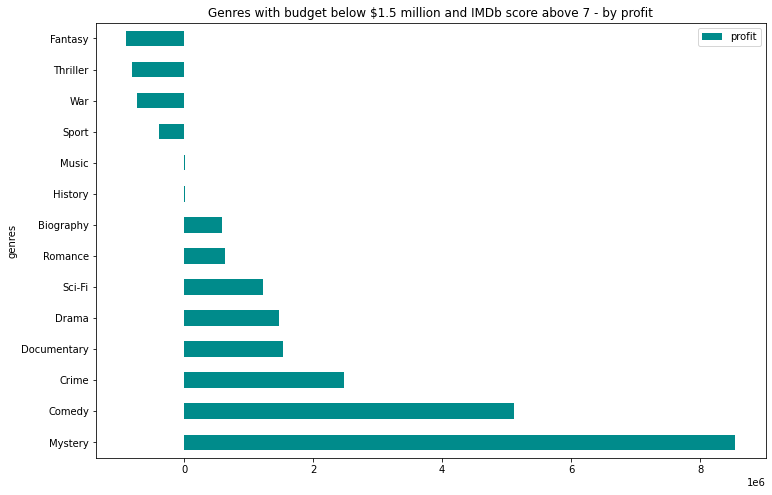

In [33]:
#Grouping by genres
genre_df_dev6=genre_df_dev4.groupby(['genres']).mean()

#Sorting values by profit
genre_df_dev6.sort_values('profit', ascending=False, inplace = True )
genre_df_dev6[['profit']].plot.barh(stacked=True, title = 'Genres with budget below $1.5 million and IMDb score above 7 - by profit', figsize=(12, 8),
                                    color='darkcyan');

#Here we can see that Mystery isthe most profitable film that has a budget of less than 1.5million dollars and IMDb score of above 7.


Looking at the table above, the most profitable movies, with a **budget of below $1.5million** and an **IMDb score of above 7** are in the genres **Mystery**, **Comedy**  and **Crime**.

As SussexBudgetProductions is interested in the most profitable and not necessarily the highest IMDb score, I broadened the data set to look only into the most profitable film that has a **budget of less than $1.5million**:


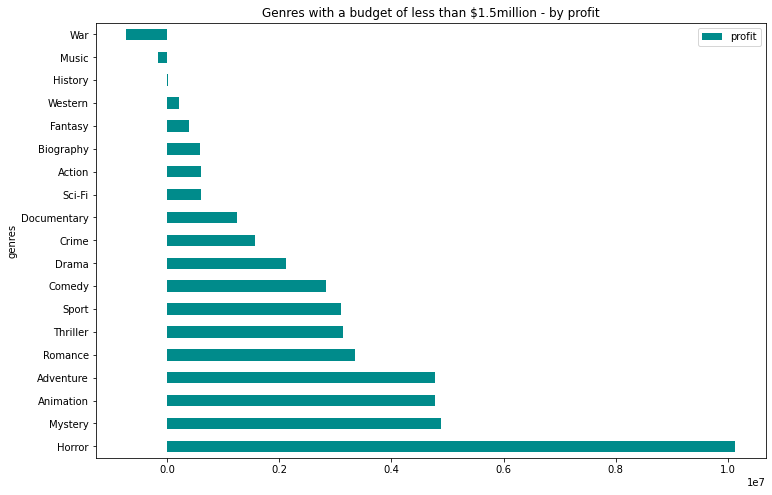

In [34]:
#Here we can see that Horror is the most profitable film that has a budget of less than 1.5million dollars.

genre_df_dev7=genre_df_dev2.groupby(['genres']).mean()
genre_df_dev7.sort_values('profit', ascending=False, inplace = True )
genre_df_dev7[['profit']].plot.barh(stacked=True, title = 'Genres with a budget of less than $1.5million - by profit', figsize=(12, 8),
                                    color='darkcyan');

**War** and **Music** make a negative profit, so we will avoid these two genres. The top profiting genres are **Horror** & **Mystery**


In [35]:
#Looking closer at horror and mystery films

genre_df_dev2[(genre_df_dev2.genres=='Horror')|(genre_df_dev2.genres=='Mystery')]

,movie_title,title_year,director_name,gross,budget,profit,country,language,imdb_score,content_rating,...,num_critic_for_reviews,movie_facebook_likes,color,plot_keywords,movie_imdb_link,aspect_ratio,facenumber_in_poster,cast_total_facebook_likes,num_voted_users,genres
4376,May,2002.0,Lucky McKee,145540.0,500000.0,-354460.0,USA,English,6.7,R,...,114.0,0,Color,case|doll|dry humor|friend|love,http://www.imdb.com/title/tt0303361/?ref_=fn_t...,1.9,1.0,2489,26773,Horror
4423,Session 9,2001.0,Brad Anderson,373967.0,1500000.0,-1126033.0,USA,English,6.5,R,...,127.0,0,Color,abandoned asylum|abandoned hospital|asbestos|l...,http://www.imdb.com/title/tt0261983/?ref_=fn_t...,2.4,0.0,469,43839,Horror
4423,Session 9,2001.0,Brad Anderson,373967.0,1500000.0,-1126033.0,USA,English,6.5,R,...,127.0,0,Color,abandoned asylum|abandoned hospital|asbestos|l...,http://www.imdb.com/title/tt0261983/?ref_=fn_t...,2.4,0.0,469,43839,Mystery
4486,Super Troopers,2001.0,Jay Chandrasekhar,18488314.0,1200000.0,17288314.0,USA,English,7.1,R,...,100.0,0,Color,drugs|highway|police|state trooper|vermont,http://www.imdb.com/title/tt0247745/?ref_=fn_t...,1.9,0.0,2893,76151,Mystery
4541,Cry_Wolf,2005.0,Jeff Wadlow,10042266.0,1000000.0,9042266.0,USA,English,5.9,PG-13,...,137.0,816,Color,e mail|game|school|serial killer|student,http://www.imdb.com/title/tt0384286/?ref_=fn_t...,2.4,0.0,3155,23021,Horror
4541,Cry_Wolf,2005.0,Jeff Wadlow,10042266.0,1000000.0,9042266.0,USA,English,5.9,PG-13,...,137.0,816,Color,e mail|game|school|serial killer|student,http://www.imdb.com/title/tt0384286/?ref_=fn_t...,2.4,0.0,3155,23021,Mystery
4545,The Devil Inside,2012.0,William Brent Bell,53245055.0,1000000.0,52245055.0,USA,English,4.2,R,...,225.0,12000,Color,critically bashed|demonic possession|exorcism|...,http://www.imdb.com/title/tt1560985/?ref_=fn_t...,1.9,0.0,988,30570,Horror
4571,Brigham City,2001.0,Richard Dutcher,798341.0,1000000.0,-201659.0,USA,English,7.2,PG-13,...,12.0,100,Color,fbi agent|mormon|prayer|sheriff|utah,http://www.imdb.com/title/tt0268200/?ref_=fn_t...,1.9,0.0,1107,983,Mystery
4594,The House of the Devil,2009.0,Ti West,100659.0,900000.0,-799341.0,USA,English,6.4,R,...,238.0,0,Color,cult film|eclipse|haunted house|lunar eclipse|...,http://www.imdb.com/title/tt1172994/?ref_=fn_t...,1.9,0.0,3833,30160,Horror
4711,Arnolds Park,2007.0,Gene Teigland,23616.0,600000.0,-576384.0,USA,English,5.6,PG-13,...,NaN,11,Color,NaN,http://www.imdb.com/title/tt1074931/?ref_=fn_t...,1.8,4.0,85,94,Mystery


In [36]:
#Looking at the averages
#Only looking at the dev set with budget less than $1,500,000

df_dev_budget = df_dev[df_dev.budget<=1500000]

df_dev_budget.mean()

title_year                     2006.7
gross                       3785057.2
budget                       662829.2
profit                      3122228.0
imdb_score                        6.4
duration                         93.1
director_facebook_likes          86.7
actor_1_facebook_likes         5565.7
actor_2_facebook_likes          369.0
actor_3_facebook_likes          241.7
num_critic_for_reviews           80.2
movie_facebook_likes           1362.4
aspect_ratio                      2.2
facenumber_in_poster              1.0
cast_total_facebook_likes      6593.3
num_voted_users               16395.6
dtype: float64

In [37]:
#I used out data set `genre_df_dev2` as it has split the genres and only showing budget of less than 1.5million.
#We need to group all movies containing genre Horror, Mystery and Animation in one group, this will be in a new data frame

#hma_df is grouped horror, mystery and animation data frame

hma_df_dev = genre_df_dev2.loc[(genre_df_dev2.genres=='Horror')|(genre_df_dev2.genres=='Mystery')|(genre_df_dev2.genres=='Animation')]
print('The mean profit for movies that contain the genre Horror, Mystery and Animation: $'+str(hma_df_dev.profit.mean()))
print('The mean profit for all genres: $'+str(df_dev_budget.profit.mean()))

#We will be comparing this against the mean of the average movie (budget <1.5million) profit $4,380,365


The mean profit for movies that contain the genre Horror, Mystery and Animation: $7872959.928571428
The mean profit for all genres: $3122228.0


array([[<AxesSubplot:title={'center':'Animation'}>,
        <AxesSubplot:title={'center':'Horror'}>],
       [<AxesSubplot:title={'center':'Mystery'}>, <AxesSubplot:>]],
      dtype=object)

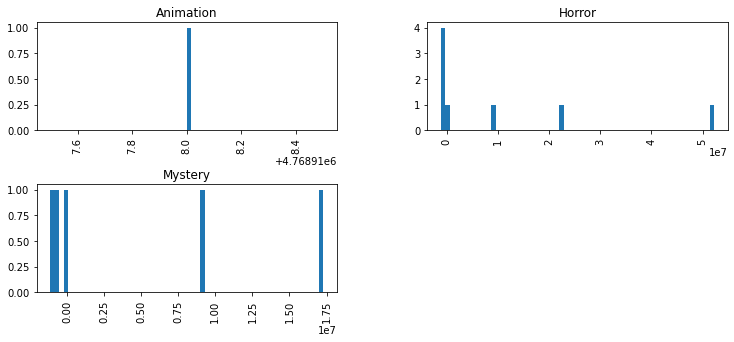

In [38]:
#Showing our profits by histograms per genre

hma_df_dev.hist(column='profit', by='genres', figsize=(12,5), bins=60)

In [39]:
#Let's look more specifically at horror

#We need to group all movies containing genre Horror

#h_df_dev is grouped horror data frame

#just selecting horro dataframe
h_df_dev = genre_df_dev2.loc[(genre_df_dev2.genres=='Horror')]

#getting the mean profit for the grouped horror data frame with budget less that 1.5mill
print('The mean profit for movies that contain the genre Horror: $'+str(h_df_dev.profit.mean()))

#getting the mean profit for the development data frame with budget less that 1.5mill
print('The mean profit for all genres: $'+str(df_dev_budget.profit.mean()))



The mean profit for movies that contain the genre Horror: $10128252.125
The mean profit for all genres: $3122228.0


***

## Part 4: Hypothesis test

For our hypothesis testing, we will use the `dev_test` data frame.


**Our 2 Hypotheses:** 

> 1. ***If*** horror films are related to higher profit, ***then*** movies in this genre will have a higher profit than average.

> 2. ***If*** more expensive films are related to higher profit, ***then*** movies that cost more than $750,000 will have a higher profit than average.

<div class="alert alert-block alert-info">
<b>Note:</b> I am taking the average across the whole, unsplit dataframe i.e. all films with budget less than \$1,500,000 (made after 2000 in the USA). 
This is \$4,380,365. </div>


### 4.1 Our first testable hypothesis

***If*** horror films are related to higher profit, ***then*** movies in this genre will have a higher profit than average (\\$4,380,365).

In order to test this hypothesis, we will need to conduct an upper-tailed test. This is because we are hypothesising that there is an increase in profit when horror films are made.

***

> $H_0: μ = μ_0$ Our null hypothesis, that there is no change.

> $H_1: μ > μ_0$ The research hypothesis, that **horror** films make higher profit

$α =0.05$

$μ_0 = $ $4,380,365 $  This is the average profit of films with budget less than $1.5million

***
The significance level ($α$) is the probability that we will reject the null hypothesis, assuming its true. 

Below I will be looking at doing a one sample z-test on the group that contains the movies with horror in the genre compared with average.

In [40]:
#What is the size of our test set?

df_test.head()
df_test.shape

(1064, 28)

In [41]:
#Splitting up our test set, similarly to what we did in the dev set

t = df_test['genres'].str.split('|').apply(Series, 1).stack()
t.index = t.index.droplevel(-1)
t.name = 'genres'

#deleting the 'genres' column from the original dataframe
del df_test['genres']

#adding the new genres to the test data frame
genre_df_test = df_test.join(t)

#only looking at films in our budget from the split genre set 
genre_df_test2 = genre_df_test[genre_df_test.budget<=1500000]

#only looking at films within our budget from the whole test set
df_test_budget = df_test[df_test.budget<=1500000]



In [42]:
#Test set means
df_test_budget.mean()

title_year                     2006.3
gross                       6443001.9
budget                       682743.5
profit                      5760258.3
imdb_score                        6.5
duration                         93.5
director_facebook_likes         301.7
actor_1_facebook_likes         4181.4
actor_2_facebook_likes          597.7
actor_3_facebook_likes          239.0
num_critic_for_reviews          114.1
movie_facebook_likes           3303.9
aspect_ratio                      2.0
facenumber_in_poster              1.3
cast_total_facebook_likes      5431.3
num_voted_users               29163.8
dtype: float64

In [43]:
#Creating a test data frame with just horror

h_df_test = genre_df_test2.loc[(genre_df_test2.genres=='Horror')]
print('The mean profit for movies that contain the genre Horror: $'+str(h_df_test.profit.mean()))
print('The mean profit for all genres in the test set: $'+str(df_test_budget.profit.mean()))

#We will be comparing this against the mean of the average movie of the whole data frame (budget <1.5million) profit $4,380,365

The mean profit for movies that contain the genre Horror: $29028746.0
The mean profit for all genres in the test set: $5760258.338709678


In [44]:
from scipy import stats
h_genres_means=h_df_test.groupby('genres')['profit'].mean()
h_genres_std=h_df_test.groupby('genres')['profit'].std()
h_genres_count=h_df_test.groupby('genres')['profit'].count()

#here I am calculating the p value, I am taking the mean horror film value and taking away the average
#then diving this value by the horror film standard diviation

P_G = (h_genres_means['Horror']-4380366)/(h_genres_std['Horror']/np.sqrt(h_genres_count['Horror']))
p_value_from_normal=(1-stats.norm.cdf(P_G))
print('Mean for Horror film profit from data: ',h_genres_means['Horror'])
print ('one tail p value from normal: ', p_value_from_normal)

Mean for Horror film profit from data:  29028746.0
one tail p value from normal:  0.012919748148091603


Above, I conducted a z-test that is looking at the probability that our hypothesis is wrong, i.e. the null hypothesis is true. The p-value ('probability value') is a number describing how likely it is that your data would have occurred by random chance (i.e. that the null hypothesis is true).

Our p value (0.0129) is less than the significance level ($α =0.05$). This indicates strong evidence that we should reject our null hypothesis. Therefore, we reject the null hypothesis and accept our first hypothesis that it will be more profitable to make a **horror film**.


### 4.2 Our second testable hypothesis

Should we make more than one film with our budget?

So, our second hypothesis: ***If*** high budget films are related to higher profit, ***then*** movies that cost more than $750,000 will have a higher profit than average (\\$4,380,365).

Using a similar frame to above:

***

> $H_0: μ = μ_0$ Our null hypothesis, that there is no change.

> $H_1: μ > μ_0$ The research hypothesis, that films with a budget of more than $750,000 make higher profit

$μ_0 = $ $4,380,365 $  This is the average profit of films with budget less than \\$1.5million

$α =0.05$

<div class="alert alert-block alert-info">
<b>Note:</b>

- *High budget*: movies that have a budget of more than \\$750,000 but less than \\$1,500,000
- *Low budget*: movies that have a budget of less than or equal to \\$750,000 </div>

In [45]:
#df_test_budget is already looking at only the values with budget less than 1500000

df_test_higherbudget = df_test_budget[df_test_budget.budget>750000]
df_test_lowerbudget = df_test_budget[df_test_budget.budget<=750000]

#Checking the numbers add up
print(df_test_budget.shape)
print(df_test_higherbudget.shape)
print(df_test_lowerbudget.shape)

(62, 27)
(26, 27)
(36, 27)


In [46]:
#Checking the mean of each profit

print(df_test_higherbudget.profit.mean())
print(df_test_lowerbudget.profit.mean())

7647977.192307692
4396905.833333333


In [47]:
#Below, I will look at what the p-value is for the second hypothesis test.

from scipy import stats
higherbudget_means=df_test_higherbudget['profit'].mean()
higherbudget_std=df_test_higherbudget['profit'].std()
higherbudget_movie_count=df_test_higherbudget.groupby('movie_title').count()

#here I am calculating the p value, I am taking the mean horror film value and taking away the average
#then diving this value by the horror film standard diviation

P_G = (higherbudget_means-4380366)/(higherbudget_std/np.sqrt(len(higherbudget_movie_count)))
p_value_from_normal=(1-stats.norm.cdf(P_G))

#Printing our stats
print('Mean for higher budget film profit from data: ',higherbudget_means)
print ('one tail p value from normal: ', p_value_from_normal)

Mean for higher budget film profit from data:  7647977.192307692
one tail p value from normal:  0.13766528760699703


Similarly to our first testable hypothesis, I conducted a z-test that is looking at the probability that our hypothesis is wrong.

Our p value (0.1377) is more than the significance level ($α =0.05$). This indicates strong evidence that we should accept our null hypothesis. Therefore, we reject our first hypothesis that it will be more profitable to make just 1 film with a higher budget. We should then look into making 2 (or more) films.

In [48]:
#Looking at the highest budget films in the 

df_test_lowerbudget.sort_values(by=['profit'],ascending=False)

,movie_title,title_year,director_name,gross,budget,profit,country,language,imdb_score,content_rating,...,actor_3_facebook_likes,num_critic_for_reviews,movie_facebook_likes,color,plot_keywords,movie_imdb_link,aspect_ratio,facenumber_in_poster,cast_total_facebook_likes,num_voted_users
4793,Paranormal Activity,2007.0,Oren Peli,107917283.0,15000.0,107902283.0,USA,English,6.3,R,...,21.0,409.0,12000,Color,dark force|entity|evil force|found footage|par...,http://www.imdb.com/title/tt1179904/?ref_=fn_t...,1.9,0.0,330,184824
4726,Open Water,2003.0,Chris Kentis,30500882.0,500000.0,30000882.0,USA,English,5.7,R,...,7.0,235.0,0,Color,bare chested male|female full frontal nudity|h...,http://www.imdb.com/title/tt0374102/?ref_=fn_t...,1.9,1.0,67,42256
4730,The Station Agent,2003.0,Tom McCarthy,5739376.0,500000.0,5239376.0,USA,English,7.7,R,...,587.0,154.0,0,Color,abandoned|depot|dwarf|newfoundland new jersey|...,http://www.imdb.com/title/tt0340377/?ref_=fn_t...,1.9,0.0,24419,58260
4855,Better Luck Tomorrow,2002.0,Justin Lin,3799339.0,250000.0,3549339.0,USA,English,7.2,R,...,13.0,51.0,661,Color,asian american|high school|overachiever|pubic ...,http://www.imdb.com/title/tt0280477/?ref_=fn_t...,1.9,1.0,139,8000
4864,Like Crazy,2011.0,Drake Doremus,3388210.0,250000.0,3138210.0,USA,English,6.7,PG-13,...,224.0,206.0,12000,Color,girlfriend|immigration|long distance relations...,http://www.imdb.com/title/tt1758692/?ref_=fn_t...,1.8,1.0,34983,46813
4478,Filly Brown,2012.0,Youssef Delara,2833383.0,427000.0,2406383.0,USA,English,5.7,R,...,183.0,16.0,0,Color,NaN,http://www.imdb.com/title/tt1869425/?ref_=fn_t...,2.4,1.0,2459,910
4900,The Grace Card,2010.0,David G. Evans,2428241.0,200000.0,2228241.0,USA,English,6.4,PG-13,...,16.0,25.0,0,Color,christian film|forgiveness|hospital|pastor|police,http://www.imdb.com/title/tt1544600/?ref_=fn_t...,NaN,7.0,77046,2099
4830,Pieces of April,2003.0,Peter Hedges,2360184.0,300000.0,2060184.0,USA,English,7.1,PG-13,...,543.0,131.0,0,Color,apartment|oven|stove|thanksgiving|thanksgiving...,http://www.imdb.com/title/tt0311648/?ref_=fn_t...,1.9,3.0,3010,18035
4696,Half Nelson,2006.0,Ryan Fleck,2694973.0,700000.0,1994973.0,USA,English,7.2,R,...,71.0,208.0,0,Color,bathroom|classroom|dialectics|drugs|student,http://www.imdb.com/title/tt0468489/?ref_=fn_t...,1.9,2.0,33734,70885
4891,Urbania,2000.0,Jon Shear,1027119.0,225000.0,802119.0,USA,English,7.0,R,...,131.0,38.0,72,Color,hot dog bun|needle|new york|rat|tourist,http://www.imdb.com/title/tt0182508/?ref_=fn_t...,1.9,1.0,964,2742


## Part 5: Summary

In summary, using evidence from the IMDb data set, I was interested in providing SussexBudgetProductions with some recommendations on how to spend the \\$1.5million investment.

**What did I find?**

Firstly, I only looked at the films that were made 2000 and made in the USA. This was to prevent confusion with currencies within the IMDb data frame. Analysing this data frame, I found that animation films had the highest profit in general. However, these films are expensive to make. Therefore, I the filtered through by budget and found that Horror films have the highest profit, meeting our budget criteria. Within the split development data frame I found that The mean profit for movies that contain the genre Horror: \\$10,128,252, compared with all genres average \\$4,380,365.

After this exploratory step, I conducted 2 hypothesis tests:

1. ***If*** horror films are related to higher profit, ***then*** movies in this genre will have a higher profit than average.

2. ***If*** more expensive films are related to higher profit, ***then*** movies that cost more than $750,000 will have a higher profit than average.

**What does the analysis recommened?**

I proved the first hypothesis to be true and the second false. Therefore, based on the data analyses, I recommend that the SussexBudgetProductions pursue making 2 films in the genre of **horror** for the USA market. However, as this conclusion is only based upon the USA market, further analysis of other countries and languages is recommended.

In [49]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

#filepath="/content/drive/My Drive/NLE Notebooks/assessment/assignment1.ipynb"
filepath="Report1_244788_DSRM.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))


Submission length is 1222


/opt/anaconda3/lib/python3.8/site-packages/nbformat/current.py:15: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  warnings.warn("""nbformat.current is deprecated.
